In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/amankd777/mlops_firste/mlops_first_ever/cubic_zirconia.csv")

In [3]:
df.columns.values[0]="id"

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.isnull().sum()

id           0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [6]:
df.size

296637

In [7]:
import seaborn as sns

<Axes: xlabel='depth', ylabel='Count'>

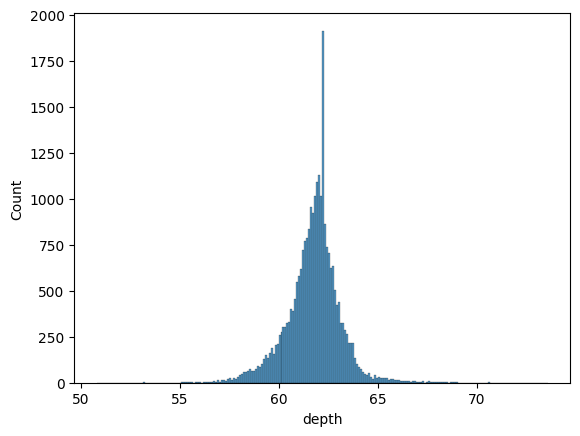

In [8]:
sns.histplot(df['depth'])

<Axes: xlabel='depth', ylabel='Count'>

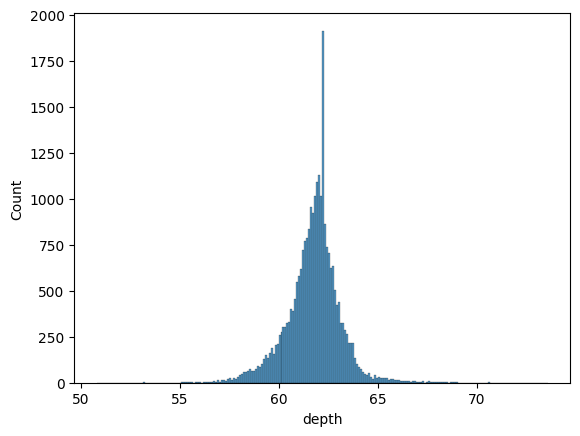

In [9]:
sns.histplot(df['depth'].dropna())

In [10]:
data = df.fillna(df["depth"].mean())

<Axes: xlabel='depth', ylabel='Count'>

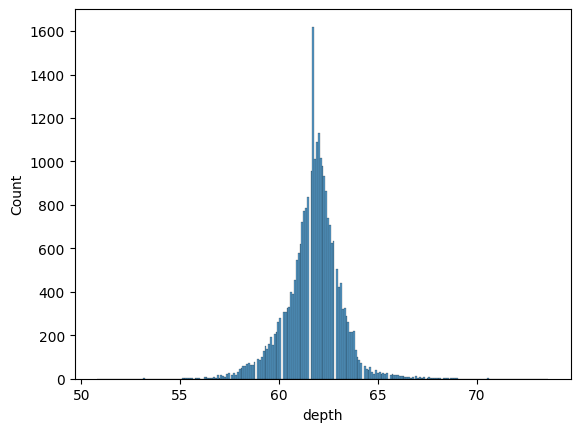

In [11]:
sns.histplot(data["depth"])

In [12]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [13]:
data.drop(labels=["id"], inplace=True, axis=1)

In [14]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [15]:
data.shape

(26967, 10)

In [16]:
data.duplicated().sum()

34

In [17]:
# Keep only the first occurrence of each duplicated row
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [18]:
data.shape

(26933, 10)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [20]:
cat_cols=data.columns[data.dtypes=="object"]

In [21]:
num_cols=data.columns[data.dtypes!="object"]

In [22]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.745282,1.393848,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [23]:
for col in cat_cols:
  print(data[col].value_counts())
  print(f"count: {len(data[col].value_counts())}")

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64
count: 5
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64
count: 7
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64
count: 8


<Axes: >

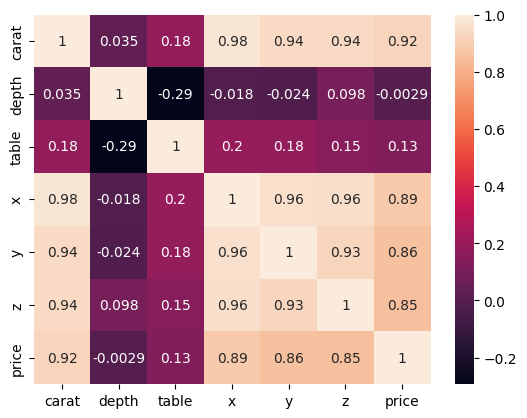

In [24]:
sns.heatmap(data[num_cols].corr(),annot=True)

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
ordinal_encoder = OrdinalEncoder()

In [27]:
encoded_color = ordinal_encoder.fit_transform(data[['color']])

In [28]:
data[['color']] = encoded_color

<ipython-input-28-4ea17d515cde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['color']] = encoded_color


In [29]:
# Manual ordinal encoding
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

clarity_map = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}

# Apply the encoding to the categorical column
data['cut'] = data['cut'].map(cut_map)
data['clarity'] = data['clarity'].map(clarity_map)
data

<ipython-input-29-5f039def076b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cut'] = data['cut'].map(cut_map)
<ipython-input-29-5f039def076b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clarity'] = data['clarity'].map(clarity_map)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,1.0,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,3.0,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,1.0,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,2.0,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,2.0,7,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,4,3.0,3,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,5,4.0,8,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,4,1.0,4,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,3,2.0,6,61.8,56.0,4.19,4.20,2.60,682


In [30]:
data["color"]=data["color"].astype(int)

<ipython-input-30-81d6fb2dac23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["color"]=data["color"].astype(int)


In [31]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,1,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,3,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,1,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,2,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,2,7,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,4,3,3,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,5,4,8,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,4,1,4,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,3,2,6,61.8,56.0,4.19,4.20,2.60,682


In [32]:
'''import pandas as pd

# Assuming df is your DataFrame and 'col' is the column you want to encode

# Get value counts of each category in the column
value_counts = df['col'].value_counts()

# Sort the value counts in descending order
sorted_values = value_counts.sort_values(ascending=False)

# Create a mapping dictionary with ordinal encoding based on count order
ordinal_encoding = {category: rank for rank, category in enumerate(sorted_values.index, 1)}

# Map the column values using the ordinal encoding
df['col_encoded'] = df['col'].map(ordinal_encoding)

# Display the DataFrame with the encoded column
print(df)
'''

"import pandas as pd\n\n# Assuming df is your DataFrame and 'col' is the column you want to encode\n\n# Get value counts of each category in the column\nvalue_counts = df['col'].value_counts()\n\n# Sort the value counts in descending order\nsorted_values = value_counts.sort_values(ascending=False)\n\n# Create a mapping dictionary with ordinal encoding based on count order\nordinal_encoding = {category: rank for rank, category in enumerate(sorted_values.index, 1)}\n\n# Map the column values using the ordinal encoding\ndf['col_encoded'] = df['col'].map(ordinal_encoding)\n\n# Display the DataFrame with the encoded column\nprint(df)\n"

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [42]:
X=df.drop(labels=["id","price"],axis=1)
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60


In [43]:
y=df["price"]
y

0         499
1         984
2        6289
3        1082
4         779
         ... 
26962    5408
26963    1114
26964    1656
26965     682
26966    5166
Name: price, Length: 26967, dtype: int64

In [45]:
cat_cols=X.select_dtypes(include="object").columns
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [53]:
num_cols=X.select_dtypes(exclude="object").columns
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [48]:
# Get value counts of cut categories and sort them by count
cut_value_counts = df['cut'].value_counts()
cut_categories = cut_value_counts.index.tolist()[::-1]
cut_categories

['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [51]:
clarity_categories = [ 'I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [66]:
num_pipe=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ("scaler", StandardScaler())
    ]
)
# Define pipelines for each categorical column
cut_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalEncoder_cut", OrdinalEncoder(categories=[cut_categories]))
    ]
)

color_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalEncoder_color", OrdinalEncoder())
    ]
)

clarity_pipe = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalEncoder_clarity", OrdinalEncoder(categories=[clarity_categories]))
    ]
)

In [76]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipeline", num_pipe, num_cols),  # Num Pipeline
        ("cut_pipeline", cut_pipe, ['cut']),   # Cut Pipeline
        ("color_pipeline", color_pipe, ['color']),  # Color Pipeline
        ("clarity_pipeline", clarity_pipe, ['clarity'])  # Clarity Pipeline
    ],
    remainder='passthrough'  # Keep any other columns not specified
)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [78]:
preprocessor.fit_transform(X_train)

array([[ 0.78796449, -0.96571264,  3.36584017, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.85115314, -0.4608357 , -1.09584537, ...,  4.        ,
         2.        ,  6.        ],
       [-1.02344341, -0.10020932,  0.68882884, ...,  2.        ,
         5.        ,  5.        ],
       ...,
       [-0.85494035,  0.        , -0.64967682, ...,  4.        ,
         3.        ,  6.        ],
       [-0.98131764, -0.4608357 , -0.64967682, ...,  4.        ,
         6.        ,  2.        ],
       [-1.02344341,  0.4767929 , -1.54201393, ...,  4.        ,
         1.        ,  3.        ]])

In [79]:
preprocessor.transform(X_test)

array([[ 0.64052431, -0.89358736,  1.1349974 , ...,  2.        ,
         2.        ,  2.        ],
       [-0.81281458,  1.27017095, -1.09584537, ...,  1.        ,
         1.        ,  1.        ],
       [-1.1498207 , -1.3984643 ,  0.68882884, ...,  3.        ,
         4.        ,  6.        ],
       ...,
       [ 1.69366844, -1.1099632 ,  0.24266029, ...,  3.        ,
         5.        ,  3.        ],
       [-0.56005999, -0.82146209, -0.20350827, ...,  4.        ,
         0.        ,  3.        ],
       [-1.00238053, -0.02808404, -1.09584537, ...,  4.        ,
         1.        ,  6.        ]])

In [80]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cut_pipeline__cut', 'color_pipeline__color',
       'clarity_pipeline__clarity'], dtype=object)

In [81]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.fit_transform(X_test),columns=preprocessor.get_feature_names_out())

In [82]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cut_pipeline__cut,color_pipeline__color,clarity_pipeline__clarity
0,0.787964,-0.965713,3.365840,0.964420,0.934381,0.813401,1.0,0.0,1.0
1,0.851153,-0.460836,-1.095845,1.008892,1.041947,0.957195,4.0,2.0,6.0
2,-1.023443,-0.100209,0.688829,-1.259163,-1.252793,-1.257232,2.0,5.0,5.0
3,2.936379,0.548918,-0.649677,2.298570,2.252064,2.366376,4.0,5.0,1.0
4,-1.044506,0.260417,-0.203508,-1.294740,-1.279684,-1.257232,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
18871,-0.812815,-0.677212,-0.203508,-0.850024,-0.831493,-0.897747,4.0,2.0,4.0
18872,-0.981318,-1.470590,0.688829,-1.072382,-1.073516,-1.199714,2.0,4.0,4.0
18873,-0.854940,0.000000,-0.649677,-0.947861,-0.921131,-0.912126,4.0,3.0,6.0
18874,-0.981318,-0.460836,-0.649677,-1.099065,-1.055588,-1.113438,4.0,6.0,2.0
